In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [128]:
currencies = ['EUR', 'USD', 'JPY', 'GBP']

In [129]:
def all_currencies_dataframe():
    '''
    This function will read the excel file I've downloaded from Danmark's Nationalbank website. The file needs cleaning, so the function will
    ignore the records that don't have relevant data by skipping the unecessary rows and columns.
    Then it will bring the table to another format, it will pivot it so that the date becomes a single column, and each currency another column.
    It will use regex to bring the date column to a more readable format.
    It will cast the currencies values to a float type and drop all the records that have other values than the ones we need (some records have
    '..' instead of actual values so those will be dropped).
    Finally it will return a clean dataframe containing the date on the first colmn, and 4 more columns, one for each currency
    '''

    file_path = 'all_currencies.xlsx'
    sheet_name = 'DNVALD'

    df_currencies = pd.read_excel(file_path, sheet_name=sheet_name, header=2, usecols='B:BBM')
    # print(df_currencies)

    dates = df_currencies.columns[1:].tolist()
    eur_values = df_currencies.iloc[0, 1:].tolist()
    usd_values = df_currencies.iloc[1, 1:].tolist()
    gbp_values = df_currencies.iloc[2, 1:].tolist()
    jpy_values = df_currencies.iloc[3, 1:].tolist()

    data = {
        'Date' : dates,
        'EUR' : eur_values,
        'USD' : usd_values,
        'GBP' : gbp_values,
        'JPY' : jpy_values
    }

    df_currencies_clean = pd.DataFrame(data)
    # print(df_currencies_clean)

    df_currencies_clean['Date'] = df_currencies_clean['Date'].str.replace(r'(\d{4})M(\d{2})D(\d{2})', r'\1-\2-\3', regex=True)
    df_currencies_clean['Date'] = pd.to_datetime(df_currencies_clean['Date'])
    # print(df_currencies_clean)

    df_currencies_clean = df_currencies_clean.replace('..', pd.NA).dropna()

    columns_to_cast = ['EUR', 'USD', 'GBP', 'JPY']
    df_currencies_clean[columns_to_cast] = df_currencies_clean[columns_to_cast].astype(float)

    # for col in columns_to_cast:
    #     df_currencies_clean[col]/= 100

    df_currencies_clean[columns_to_cast] /= 100
        
    return df_currencies_clean

In [130]:
def plot_currency_against_dkk(currency: str):

    '''This function will return a plot that will show the highest appreciation and depreciation of each currency against the Danish krone'''

    main_df = all_currencies_dataframe()
    df = main_df[['Date',f'{currency}']]
    df.plot(x='Date', y=[f'{currency}'])

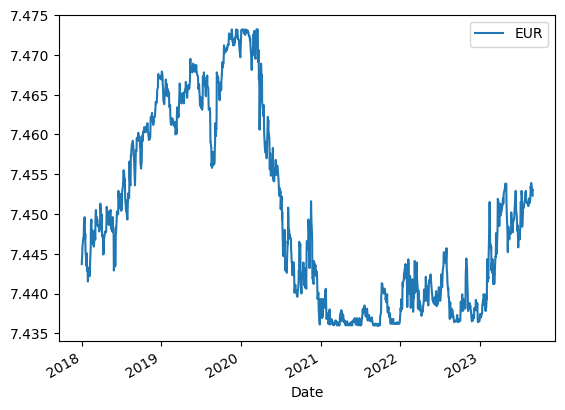

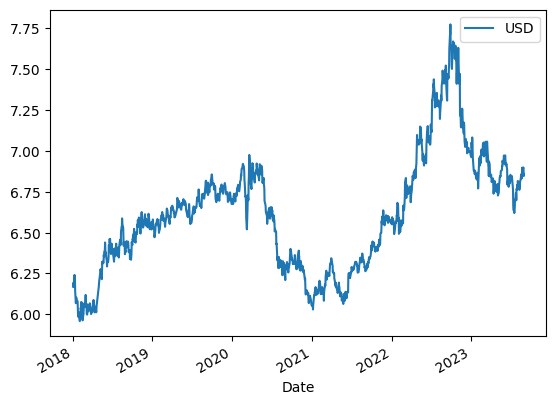

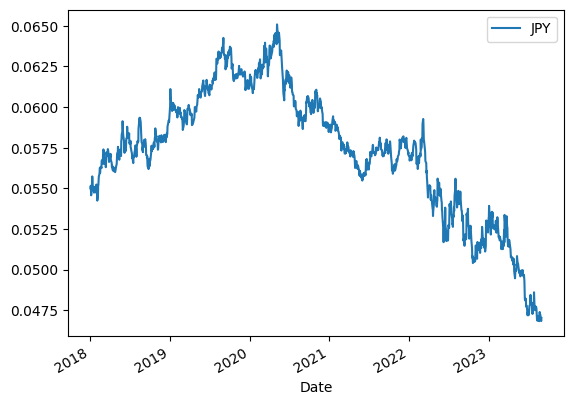

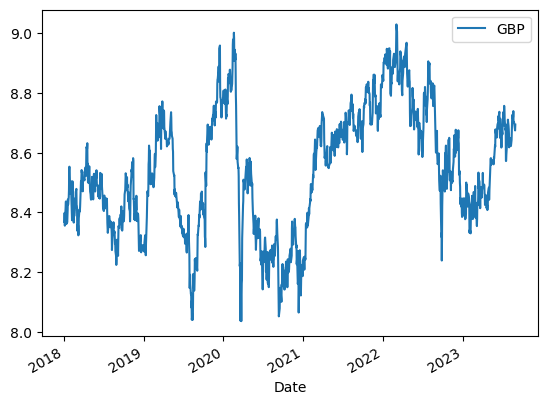

In [131]:
for currency in currencies:
    plot_currency_against_dkk(currency)

In [132]:
def plot_against_dkk_min_max(currency: str):

    '''This function will show the same appreciantion/depreciation of each currency against the Danish Krone, but it will also give 
    the exact date when these values where achieved'''


    df = all_currencies_dataframe()
    df = df[['Date',f'{currency}']]

    df_euro2 = df.copy()

    # Convert 'Date' column to datetime format
    df_euro2['Date'] = pd.to_datetime(df_euro2['Date'])

    # Find the date when the highest and lowest values were achieved
    max_date = df_euro2.loc[df_euro2[f'{currency}'].idxmax(), 'Date']
    min_date = df_euro2.loc[df_euro2[f'{currency}'].idxmin(), 'Date']

    # Plot the DataFrame
    plt.figure(figsize=(10, 6))
    plt.plot(df_euro2['Date'], df_euro2[f'{currency}'])

    # Create dotted horizontal lines at the highest and lowest values
    plt.axhline(y=df_euro2[f'{currency}'].max(), color='red', linestyle='dotted', label = f"{df_euro2[f'{currency}'].max():.2f} at {max_date.strftime('%Y-%m-%d')}")
    plt.axhline(y=df_euro2[f'{currency}'].min(), color='green', linestyle='dotted', label = f"{df_euro2[f'{currency}'].min():.2f} at {min_date.strftime('%Y-%m-%d')}")

    # Add a legend with the dates
    # plt.legend([f'Max ({max_date.strftime("%Y-%m-%d")})', f'Min ({min_date.strftime("%Y-%m-%d")})'], loc='upper left')
    plt.legend()

    plt.xlabel('Date')
    plt.ylabel(f'{currency}')
    plt.title(f'{currency} Over Time')
    plt.tight_layout()

    # Show the plot
    plt.show()

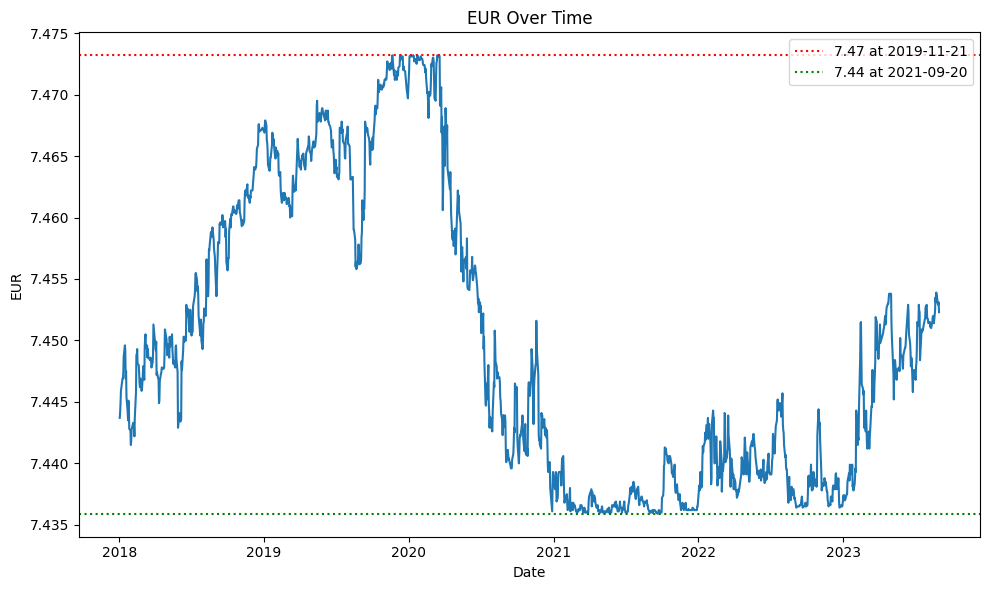

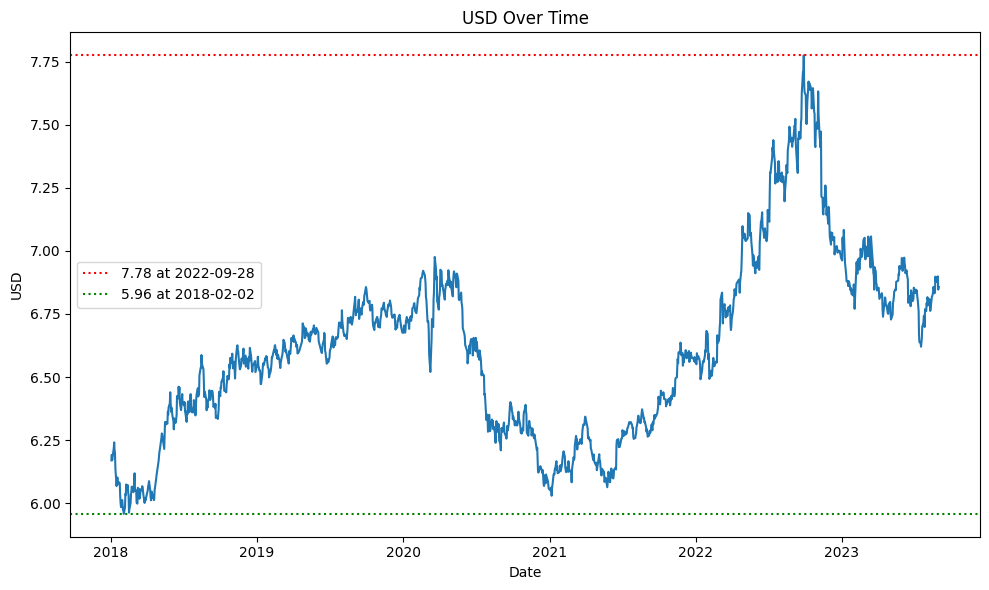

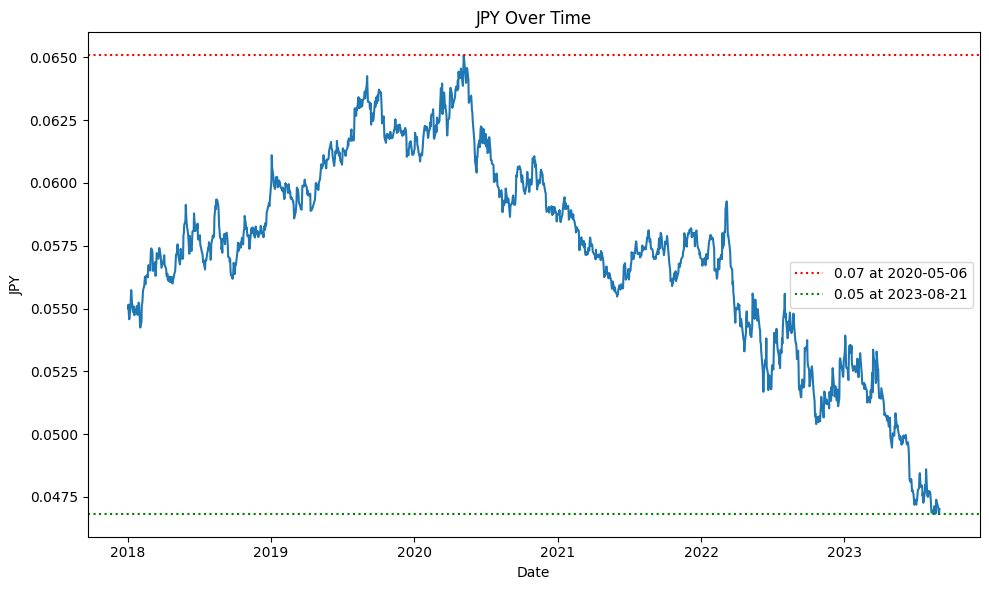

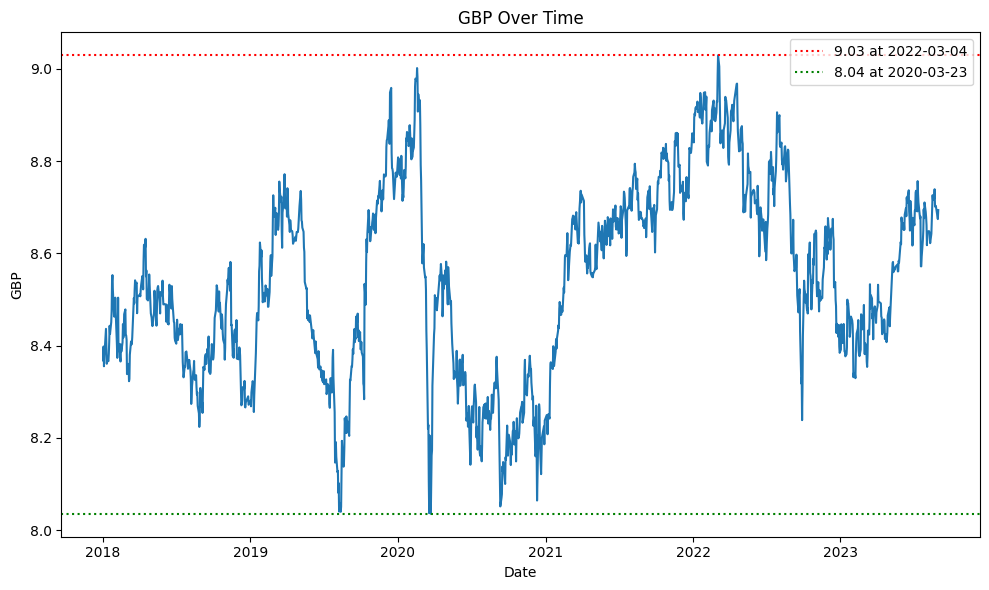

In [133]:
for currency in currencies:
    plot_against_dkk_min_max(currency)

In [134]:
def min_max_appreciation_depreciation_against_euro_in_a_day(currency: str):

    '''This will output the same thing as the function above, but with more details. It will give as the exact dates when the highest and lowest 
    values were reached'''

    df = all_currencies_dataframe()
    df2 = df[['Date',f'{currency}']]
    df_new = df2.copy()
   
   
    df_new['EUR_shift'] = df_new[f'{currency}'].shift(1)
    df_new.dropna(inplace=True)
    df_new['diff'] = (df_new['EUR_shift']/df_new[f'{currency}']-1)*100


    # Find the date when the highest and lowest values were achieved
    max_date = df_new['Date'][df_new['diff'].idxmax()]
    min_date = df_new['Date'][df_new['diff'].idxmin()]
    max_val= df_new['diff'].max()
    min_val = df_new['diff'].min()

    # Create the plot
    fig, ax = plt.subplots()
    plt.plot(df_new['Date'], df_new['diff'])

    # Add markers for the max and min values
    plt.plot(max_date, df_new['diff'].max(), marker='o', markersize=8, label=f"{max_val:.2f} % ({max_date.strftime('%Y-%m-%d')})", linestyle='', color='green')
    plt.plot(min_date, df_new['diff'].min(), marker='o', markersize=8, label=f"{min_val:.2f} % ({min_date.strftime('%Y-%m-%d')})", linestyle='', color='red')

    # Add legend
    plt.legend()

    # Show the plot
    plt.title(f'Biggest appreciation and depreciation of {currency} in a day')
    plt.ylabel('Percentage (%)')
    plt.show()

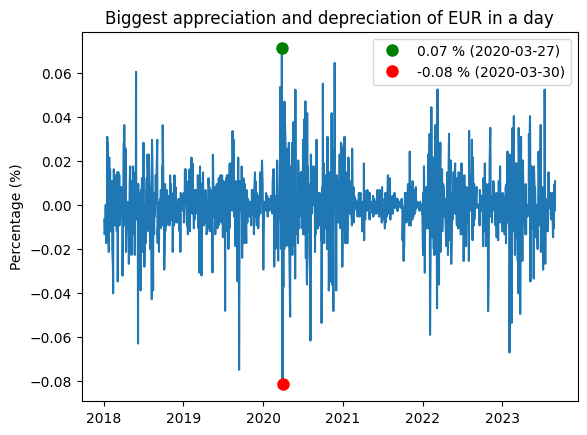

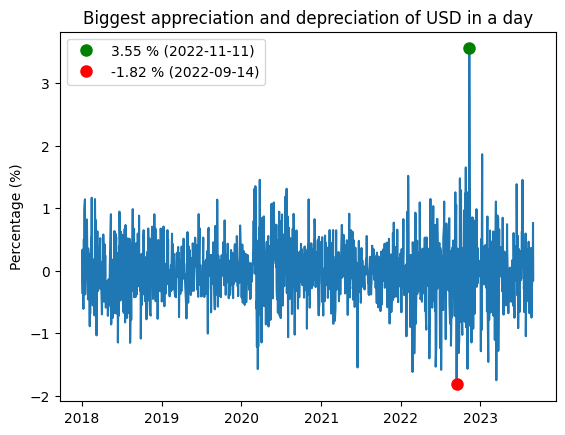

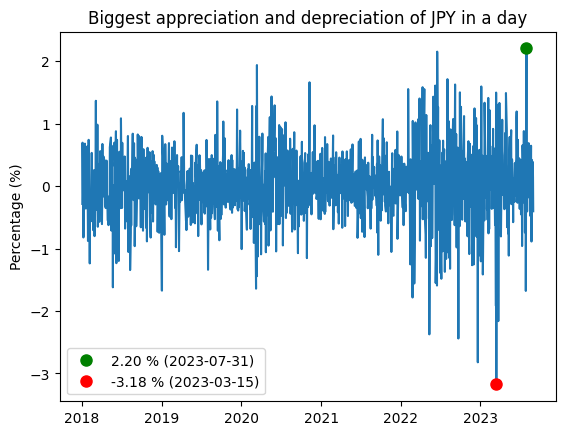

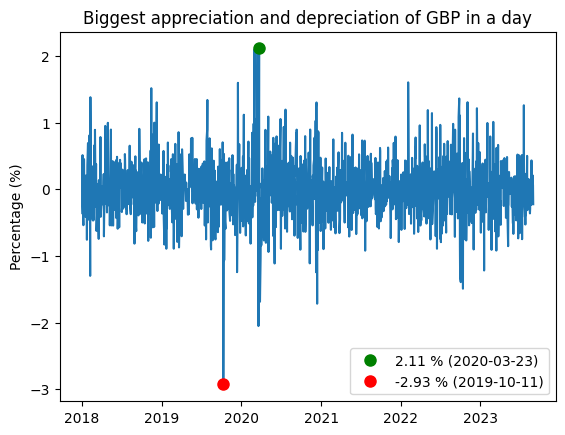

In [135]:
for currency in currencies:
    min_max_appreciation_depreciation_against_euro_in_a_day(currency)